 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_df = pd.read_csv(Path("./Resources/whale_returns.csv"))
whale_returns_df["Date"] = pd.to_datetime(whale_returns_df["Date"])
whale_returns_df.set_index('Date', inplace=True)
whale_returns_df.sort_index(inplace=True)
# whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(Path("./Resources/algo_returns.csv"))
algo_returns_df["Date"] = pd.to_datetime(algo_returns_df["Date"])
algo_returns_df.set_index('Date', inplace=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(Path("./Resources/sp500_history.csv"))
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df.set_index('Date', inplace=True)
sp500_df.sort_index(inplace=True)

print(f"""
    First 2 
        Year: {sp500_df.index.year[:2]} 
        Month: {sp500_df.index.month[:2]}
        Day: {sp500_df.index.day[:2]}
    Last 2 
        Year: {sp500_df.index.year[-2:]} 
        Month: {sp500_df.index.month[-2:]}
        Day: {sp500_df.index.day[-2:]}
""")


    First 2 
        Year: Index([2012, 2012], dtype='int32', name='Date') 
        Month: Index([10, 10], dtype='int32', name='Date')
        Day: Index([1, 2], dtype='int32', name='Date')
    Last 2 
        Year: Index([2019, 2019], dtype='int32', name='Date') 
        Month: Index([4, 4], dtype='int32', name='Date')
        Day: Index([22, 23], dtype='int32', name='Date')



/var/folders/r3/jj36cy5n5bdd4bvr4wj37hqh0000gn/T/ipykernel_25015/1319414901.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace('$', '').astype(float)
sp500_df.sort_index(inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isna().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close': 'sp500'}, inplace=True)

sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

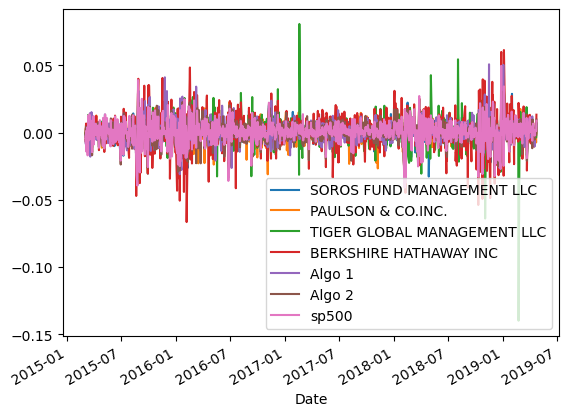

In [15]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

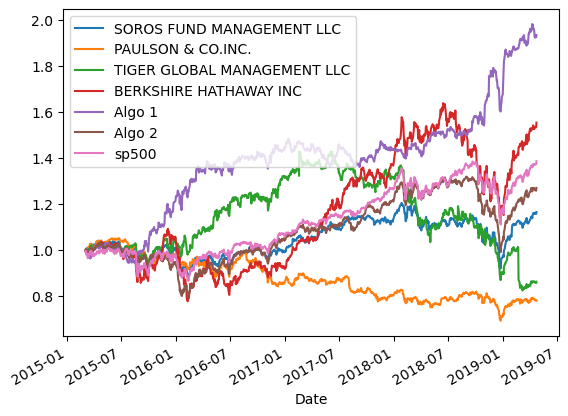

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

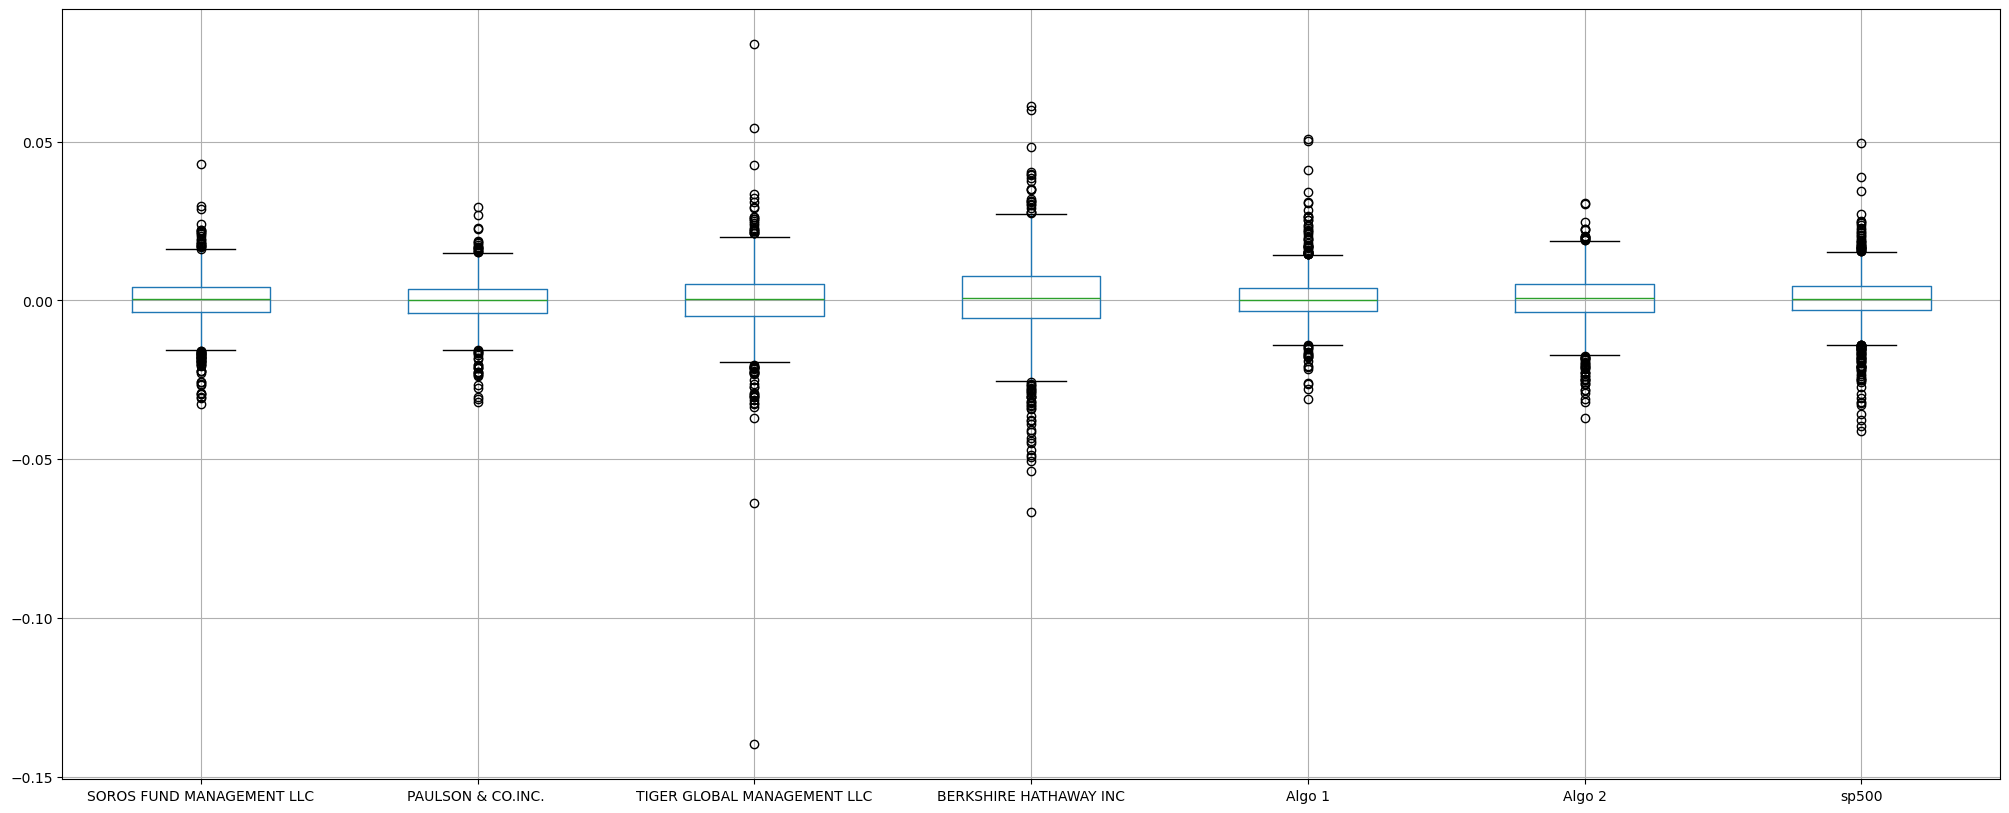

In [17]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df.sp500.std()
# Determine which portfolios are riskier than the S&P 500
risky_portfolios = [col for col in combined_df if combined_df[col].std() > sp500_std]
risky_portfolios

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

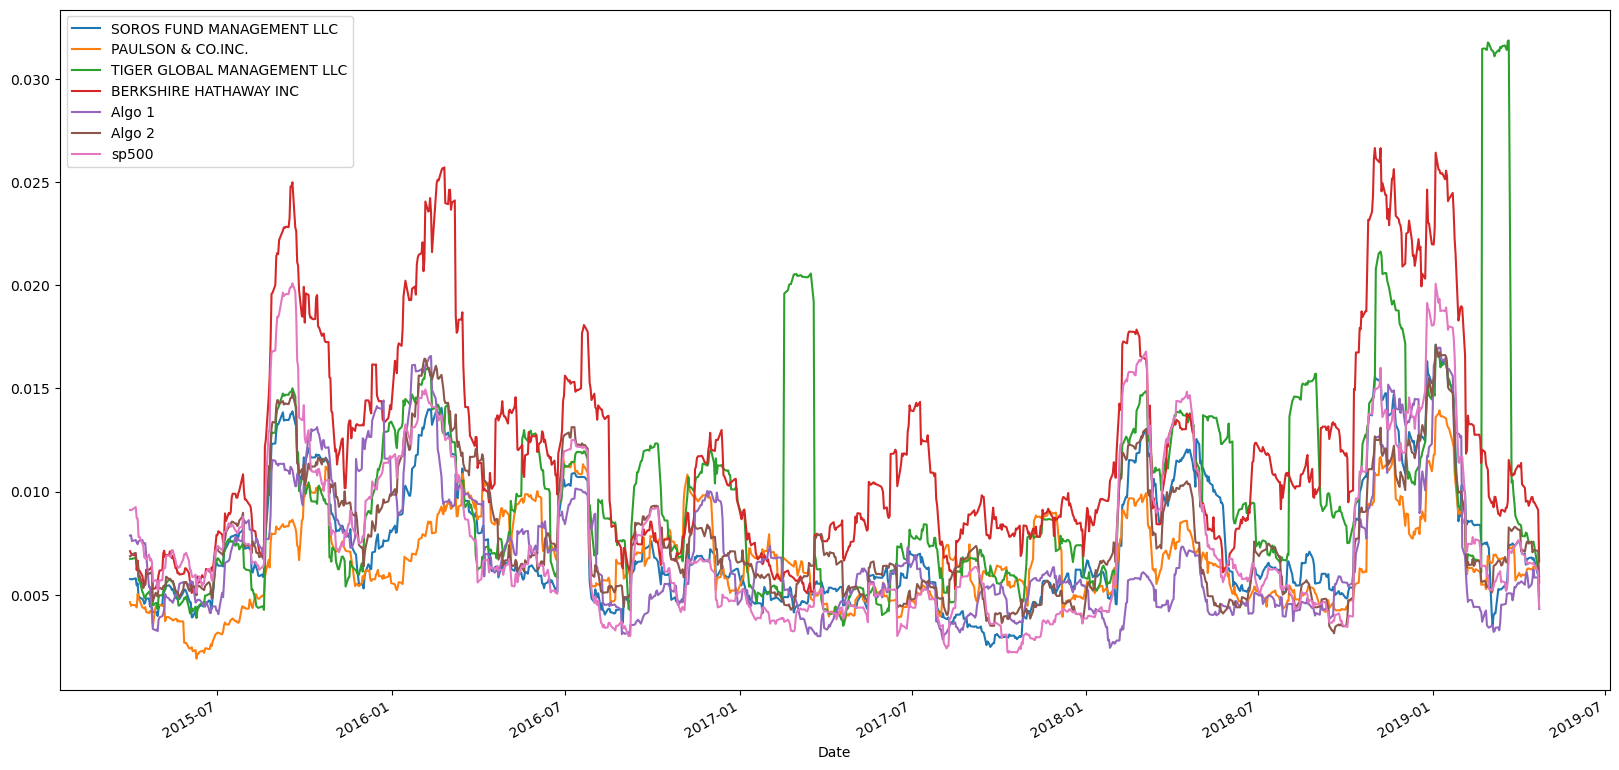

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21 = combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
corr = combined_df.corr()
# Display de correlation matrix
corr.values

array([[1.        , 0.69991395, 0.5612432 , 0.75435986, 0.32121145,
        0.82687268, 0.83786367],
       [0.69991395, 1.        , 0.434479  , 0.54562286, 0.26884034,
        0.67815203, 0.66973173],
       [0.5612432 , 0.434479  , 1.        , 0.42442305, 0.16438739,
        0.50741404, 0.62394588],
       [0.75435986, 0.54562286, 0.42442305, 1.        , 0.29203338,
        0.68808234, 0.75137149],
       [0.32121145, 0.26884034, 0.16438739, 0.29203338, 1.        ,
        0.28824252, 0.2794941 ],
       [0.82687268, 0.67815203, 0.50741404, 0.68808234, 0.28824252,
        1.        , 0.85876407],
       [0.83786367, 0.66973173, 0.62394588, 0.75137149, 0.2794941 ,
        0.85876407, 1.        ]])

In [23]:
# Of portfolio find series most correlated with the sp500
most_correlated_w_sp500 = corr['sp500'].drop('sp500').idxmax()
most_correlated_w_sp500

'Algo 2'

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

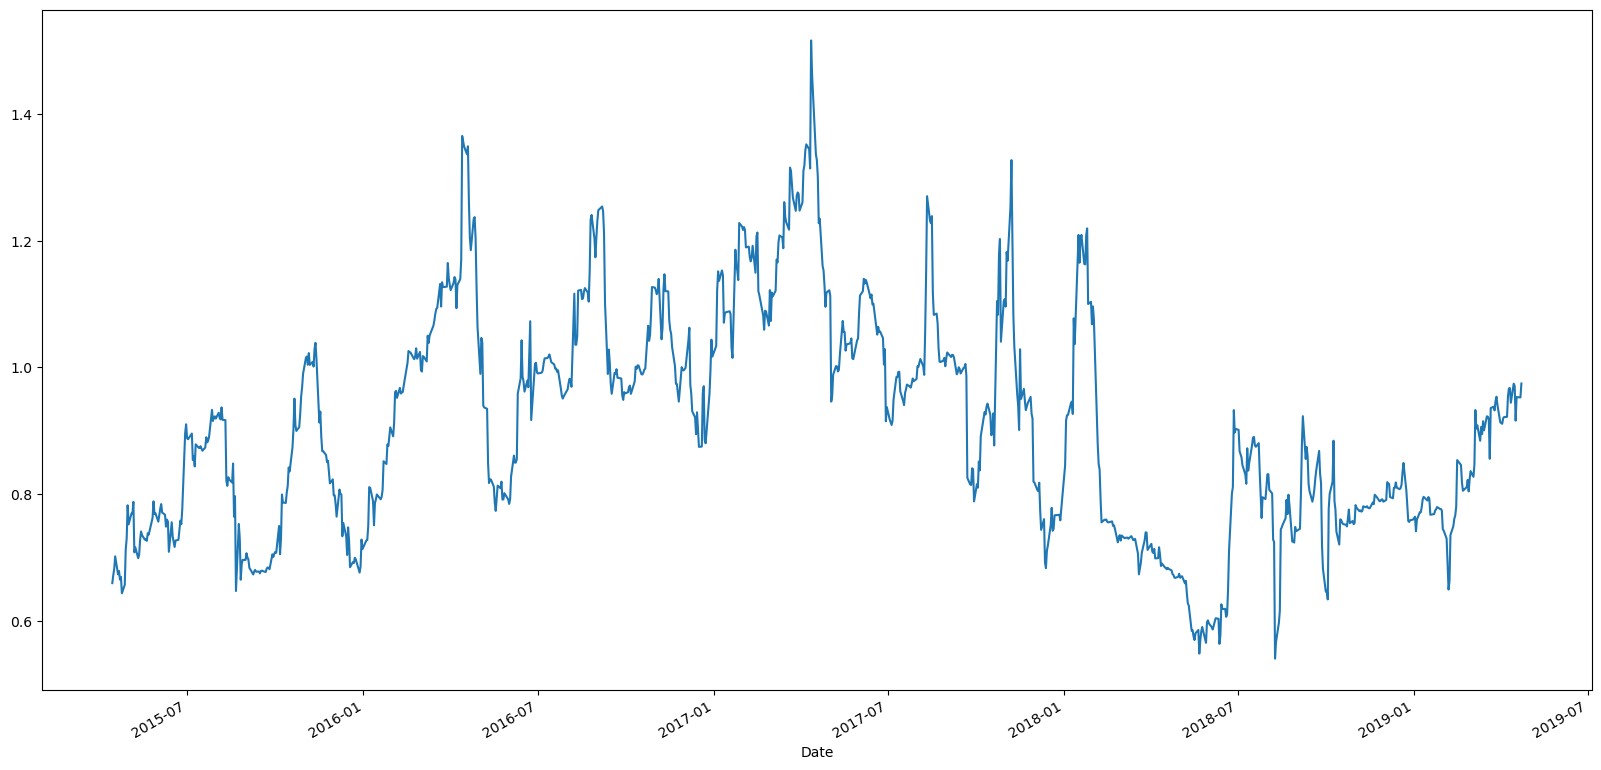

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 2'].rolling(window=30).cov(combined_df['sp500'])
# Calculate variance of S&P 500
variance = combined_df['sp500'].rolling(window=30).var()
# Computing beta
algo2_beta = covariance / variance

rolling_beta_trend = pd.Series(algo2_beta, index=combined_df.index)

rolling_beta_trend.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

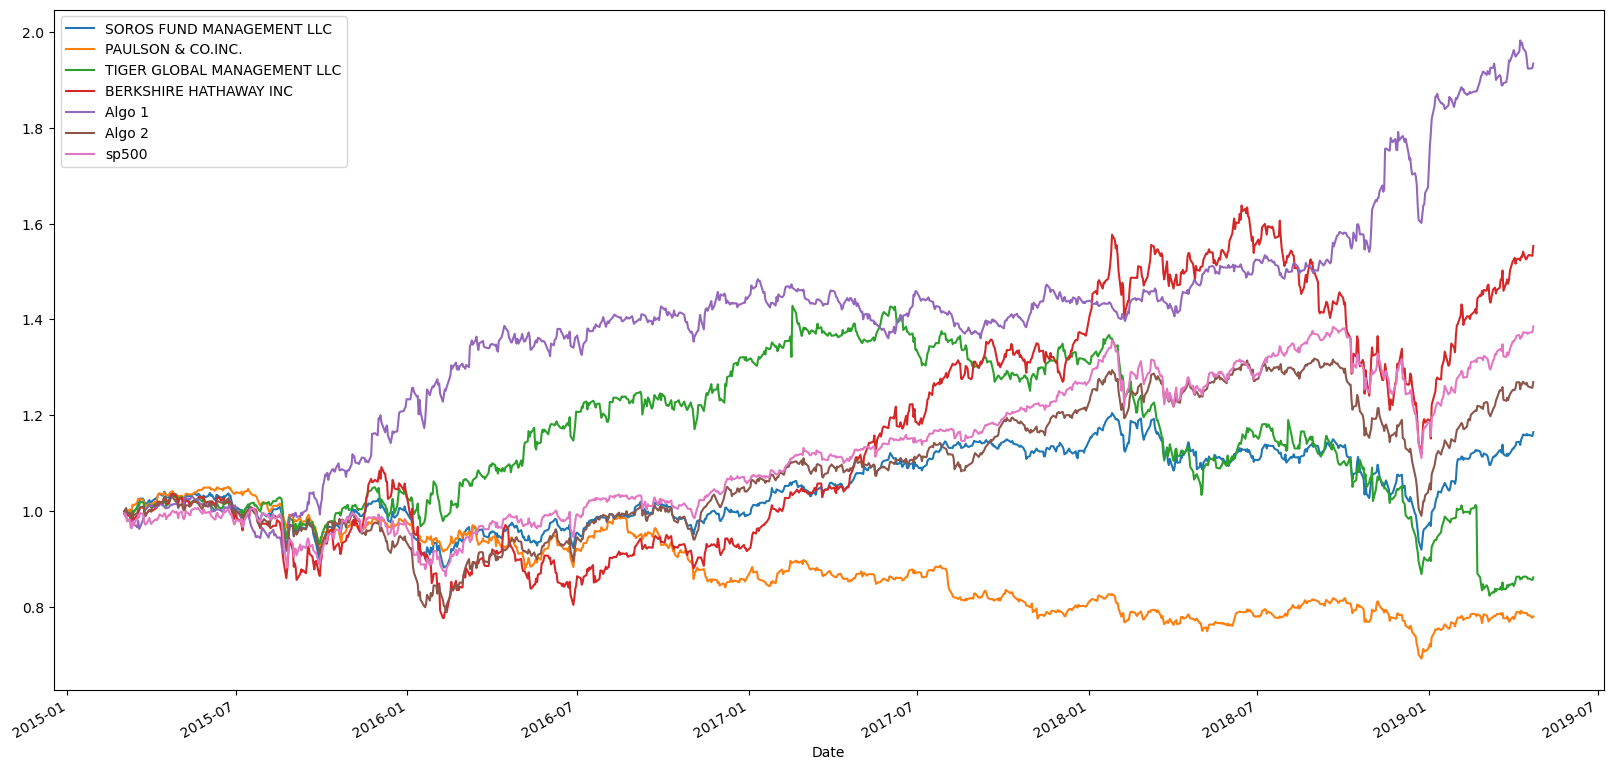

In [25]:
# Use `ewm` to calculate the rolling window
algo_1_ewm = combined_df["Algo 1"].ewm(span = 21,adjust = False).mean()
(1+combined_df).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

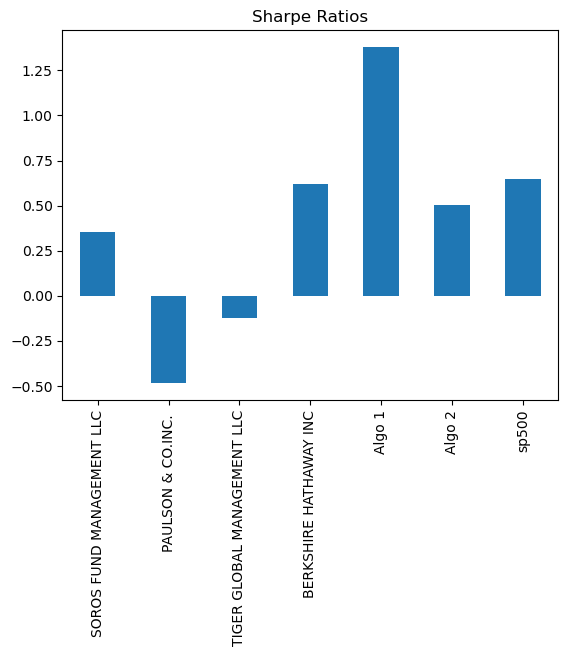

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

sharpe_ratios

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed the market and the 'whales'. 

Algo 2 did not beat the market nor the top performing whale Berkshire.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
visa = pd.read_csv(Path("./Resources/v.csv"))
visa["Date"] = pd.to_datetime(visa["Date"]).dt.date
visa.set_index("Date", inplace=True)
visa.sort_index(inplace=True)
visa.head()

,Close
Date,
2012-10-01,34.18
2012-10-02,34.00
2012-10-03,34.63
2012-10-04,34.92
2012-10-05,35.07


In [29]:
# Reading data from 2nd stock
coke = pd.read_csv(Path("./Resources/ko.csv"))
coke["Date"] = pd.to_datetime(coke["Date"]).dt.date
coke.set_index("Date", inplace=True)
coke.sort_index(inplace=True)
coke.head()

,Close
Date,
2012-10-01,38.38
2012-10-02,38.34
2012-10-03,38.24
2012-10-04,38.33
2012-10-05,38.58


In [30]:
# Reading data from 3rd stock
msft = pd.read_csv(Path("./Resources/msft.csv"))
msft["Date"] = pd.to_datetime(msft["Date"]).dt.date
msft.set_index("Date", inplace=True)
msft.sort_index(inplace=True)
msft.head()

,Close
Date,
2012-10-01,29.49
2012-10-02,29.66
2012-10-03,29.86
2012-10-04,30.03
2012-10-05,29.85


In [31]:
# Combine all stocks in a single DataFrame
custom_stocks_df = pd.concat([msft, coke, visa], axis="columns", join="inner")
custom_stocks_df.tail()

,Close,Close,Close
Date,,,
2019-04-15,121.05,47.00,160.44
2019-04-16,120.77,46.95,160.23
2019-04-17,121.77,47.28,160.44
2019-04-18,123.37,47.48,160.16
2019-04-22,123.76,47.40,160.40


In [32]:
# Reset Date index
type(custom_stocks_df.index)

pandas.core.indexes.base.Index

In [33]:
# Reorganize portfolio data by having a column per symbol
custom_stocks_df.columns = ["msft", "coke", "visa"]
custom_stocks_df.head()

,msft,coke,visa
Date,,,
2012-10-01,29.49,38.38,34.18
2012-10-02,29.66,38.34,34.00
2012-10-03,29.86,38.24,34.63
2012-10-04,30.03,38.33,34.92
2012-10-05,29.85,38.58,35.07


In [34]:
# Calculate daily returns
daily_returns_stocks = custom_stocks_df.pct_change()
# Drop NAs
daily_returns_stocks.dropna(inplace=True)
# Display sample data
daily_returns_stocks.sample(2)

,msft,coke,visa
Date,,,
2013-01-16,-0.006248,0.00000,-0.001496
2017-05-26,0.004884,-0.00044,-0.003893


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = custom_stocks_df.dot(weights)
# Display sample data
weighted_returns.tail()

Date
2019-04-15    109.496667
2019-04-16    109.316667
2019-04-17    109.830000
2019-04-18    110.336667
2019-04-22    110.520000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.merge(daily_returns_stocks, combined_df, left_index=True, right_index=True)
all_returns.tail()

,msft,coke,visa,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,,,
2019-04-15,0.000827,0.005563,0.005011,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,-0.002313,-0.001064,-0.001309,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.008280,0.007029,0.001311,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.013140,0.004230,-0.001745,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.003161,-0.001685,0.001499,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isna().any()

msft                           False
coke                           False
visa                           False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
stocks_std = all_returns.std()
stocks_std

msft                           0.014832
coke                           0.008819
visa                           0.013079
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

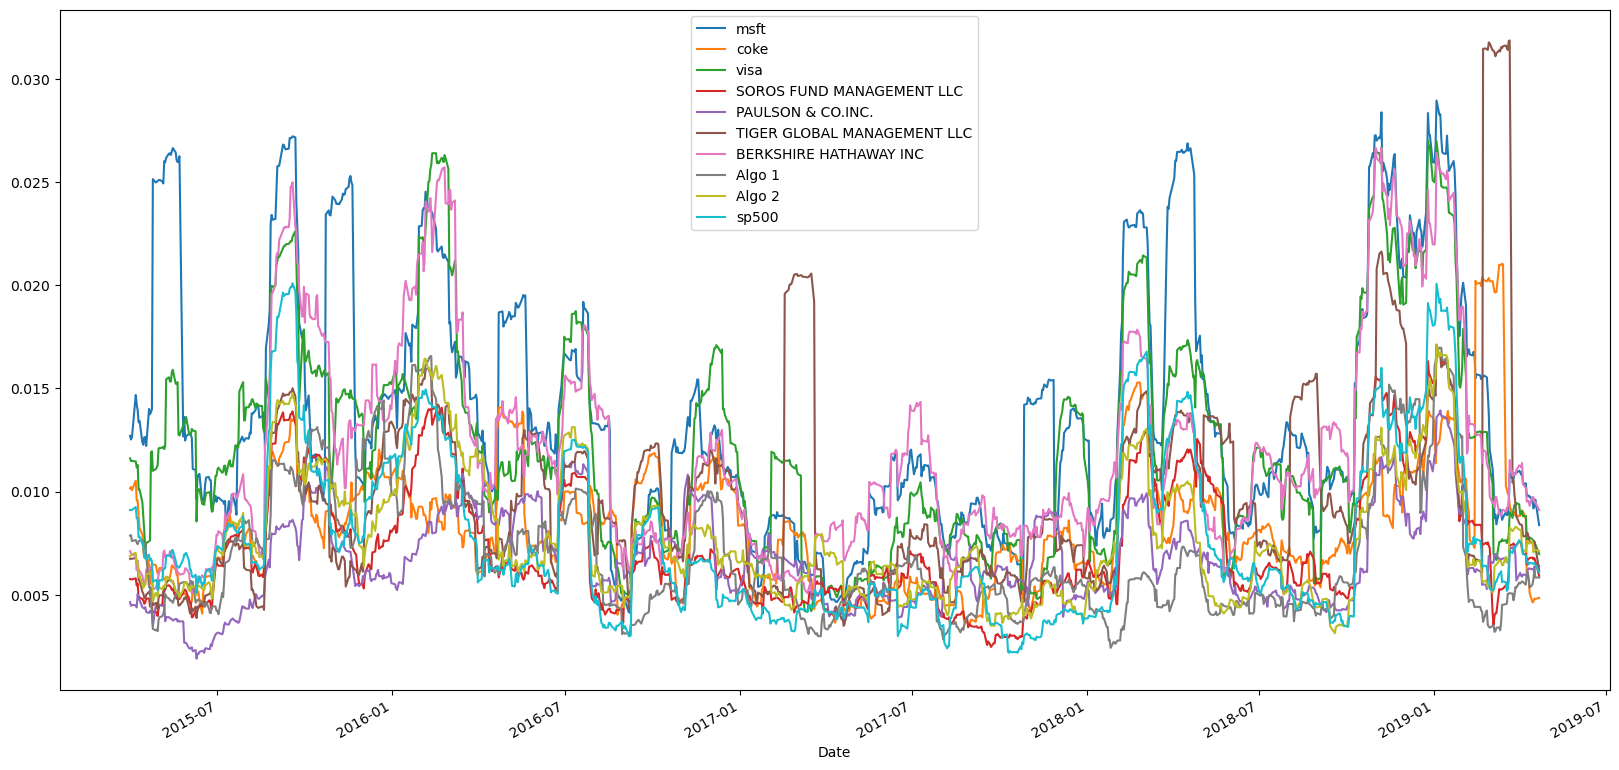

In [39]:
# Calculate rolling standard deviation
rolling_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
corr = all_returns.corr()
corr

,msft,coke,visa,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
msft,1.000000,0.338612,0.677684,0.604408,0.456688,0.439915,0.640628,0.188696,0.589638,0.754163
coke,0.338612,1.000000,0.332778,0.322307,0.219300,0.445150,0.250042,0.066987,0.327402,0.495613
visa,0.677684,0.332778,1.000000,0.637031,0.489628,0.462460,0.655460,0.218528,0.626180,0.768683
SOROS FUND MANAGEMENT LLC,0.604408,0.322307,0.637031,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.837731
PAULSON & CO.INC.,0.456688,0.219300,0.489628,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.669636
TIGER GLOBAL MANAGEMENT LLC,0.439915,0.445150,0.462460,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.623776
BERKSHIRE HATHAWAY INC,0.640628,0.250042,0.655460,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.751137
Algo 1,0.188696,0.066987,0.218528,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.279130
Algo 2,0.589638,0.327402,0.626180,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.858620
sp500,0.754163,0.495613,0.768683,0.837731,0.669636,0.623776,0.751137,0.279130,0.858620,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [41]:
# Calculate and plot Beta
covariance = all_returns.rolling(window=60).cov(all_returns["sp500"])
variance = all_returns["sp500"].rolling(window=60).var()
beta = covariance / variance

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))

<Axes: >

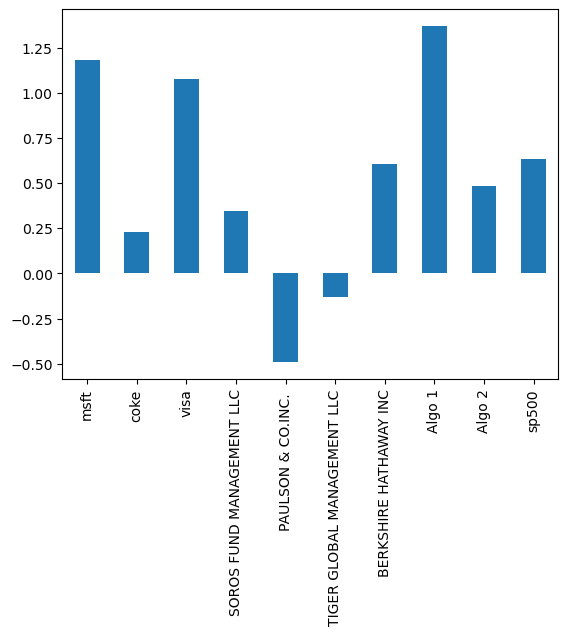

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Microsoft and Visa beat the market, the whales and Algo 2.